In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
del data['User ID']

In [4]:
data.isnull().sum()
     

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data =data.drop_duplicates()

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
#encodeing the data column Gender
data['Gender'] = data['Gender'].map({'Male' : 0,'Female' : 1})

<ipython-input-7-e5bdfa173bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'Male' : 0,'Female' : 1})


In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [9]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
upper_threshold = data.Age.quantile(0.75) + (IQR*1.5)
lower_threshold = data.Age.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(3.5, 71.5)

In [10]:
IQR = data.EstimatedSalary.quantile(0.75) - data.EstimatedSalary.quantile(0.25)
upper_threshold = data.EstimatedSalary.quantile(0.75) + (IQR*1.5)
lower_threshold = data.EstimatedSalary.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(-24500.0, 155500.0)

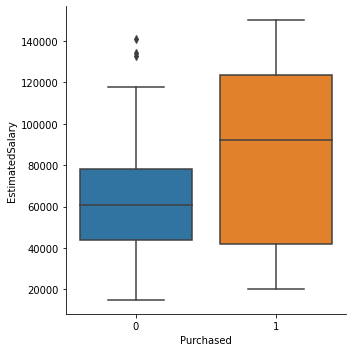

In [11]:
sns.catplot(data=data, x="Purchased", y="EstimatedSalary", kind="box")
     

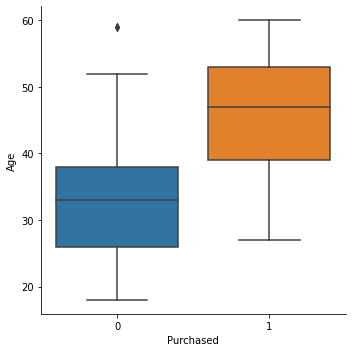

In [12]:
sns.catplot(data=data, x="Purchased", y="Age", kind="box")
     

**Splitting the dataset into the Training set and Test set**

In [13]:
from sklearn.model_selection import train_test_split

X = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values

x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 )

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [15]:
from sklearn.ensemble import RandomForestClassifier
rc  = RandomForestClassifier(max_depth=3,n_estimators=1000)

rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [16]:
y_pred = rc.predict(x_test)
y_pred
     

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

**Predicting the Test set results**

In [17]:

from sklearn.metrics import  roc_auc_score

print('print Auroc score :',roc_auc_score(y_pred, y_test) )

print Auroc score : 0.8752751283932503


**Making the Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[45,  2],
       [ 6, 23]])

**Visualising the Training set results**

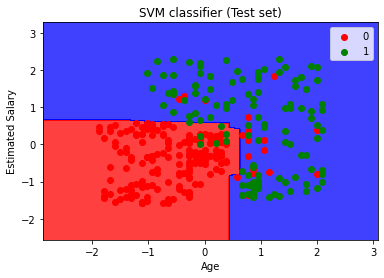

In [19]:
from matplotlib.colors import ListedColormap  

x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, rc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

**Visualising the Test set results**

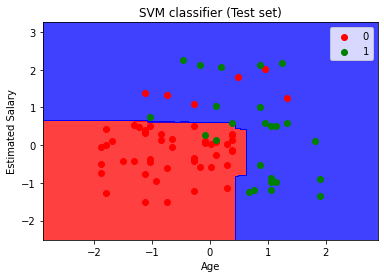

In [20]:
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, rc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  
     